In [1]:
import cv2
import import_ipynb
import numpy as np
%matplotlib inline

from settings import *

from utils.general import clean_session
from utils.models.ocr import predict, load_model
from utils.images import show_image, dilate_image, label_components, filter_components, get_bounding_boxes, prepare_img_for_prediction, visualize_bounding_boxes, get_components_mask

2024-03-23 13:24:59.487591: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-23 13:24:59.831167: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-23 13:25:06.348619: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
clean_session()
model = load_model(version=2.5)

2024-03-23 13:25:13.495030: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-23 13:25:13.649081: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-23 13:25:13.650184: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Loaded model models/ocr_modelv2.5 from disk


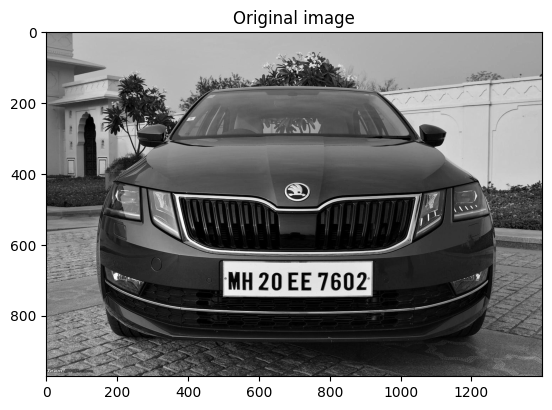

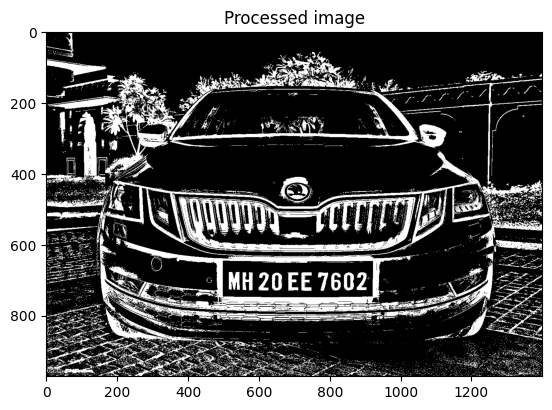

KeyboardInterrupt: 

: 

In [5]:
original = cv2.imread('test_images/test_image.jpg', cv2.IMREAD_GRAYSCALE)
show_image(original, "Original image")

processed_image = dilate_image(original)
show_image(processed_image, "Processed image")

labels = label_components(processed_image)

# Set lower bound and upper bound criteria for characters
total_pixels = processed_image.shape[0] * processed_image.shape[1]
lower = total_pixels // 90 # heuristic param, TODO: TUNE
upper = total_pixels // 20 # heuristic param, TODO: TUNE

components = filter_components(labels, lower, upper)

mask = get_components_mask(original, components)

bounding_boxes = get_bounding_boxes(mask)

predictions = ""
for i, box in enumerate(bounding_boxes):
    x, y, w, h = box
    roi = mask[y:y+h, x:x+w]
    char = prepare_img_for_prediction(roi)
    show_image(char, f"Character {i}")
    prediction = predict(model, char)
    print(f"Prediction for character {i}: {prediction}")
    predictions += prediction[0]

# Draw bounding boxes and predictions on the original image
result_image = visualize_bounding_boxes(original, bounding_boxes, predictions)
show_image(result_image, "All detections")

print(f"License plate: {predictions}")